<a href="https://colab.research.google.com/github/hanguyenai/sudo-code-nlp/blob/main/09_web_scraping/Web_Scraping_BeautifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scraping Zyxware (Fortune 500 List)

Utilizes `requests` and `BeautifulSoup` to parse HTML and locate the Fortune 500 data table.

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.zyxware.com/articles/5914/list-of-fortune-500-companies-and-their-websites-2018'
response = requests.get(url)
print(response.status_code)

200


### Inspecting HTML Structure

In [ ]:
print("Content of the website: ", response.content[:500])

Content of the website:  b'<!DOCTYPE html>\n<html lang="en" dir="ltr" prefix="og: https://ogp.me/ns#">\n  <head>\n    <meta charset="utf-8" />\n<script>dataLayer = [];dataLayer.push({"tag": "5914"});</script>\n<script>var script = document.createElement(\'script\');\n        var fullDate = new Date();\n        \n        //convert month to 2 digits\n        var twoDigitMonth = ((fullDate.getMonth().length+1) === 1)? (fullDate.getMonth()+1) : \'0\' + (fullDate.getMonth()+1);\n        var currentDate = fullDate.getDate() + \'-\' + twoDigitM'


### Parsing HTML & Targeting Data

In [ ]:
soup = BeautifulSoup(response.content)

In [ ]:
data_table = soup.find_all('table', 'data-table')[0]
data_table

<table class="data-table">
<thead>
<tr>
<th>Rank</th>
<th>Company</th>
<th>Website</th>
</tr>
</thead>
<tbody>
<tr>
<td>1</td>
<td>Walmart</td>
<td><a href="http://www.stock.walmart.com">http://www.stock.walmart.com</a></td>
</tr>
<tr>
<td>2</td>
<td>Exxon Mobil</td>
<td><a href="http://www.exxonmobil.com">http://www.exxonmobil.com</a></td>
</tr>
<tr>
<td>3</td>
<td>Berkshire Hathaway</td>
<td><a href="http://www.berkshirehathaway.com">http://www.berkshirehathaway.com</a></td>
</tr>
<tr>
<td>4</td>
<td>Apple</td>
<td><a href="http://www.apple.com">http://www.apple.com</a></td>
</tr>
<tr>
<td>5</td>
<td>UnitedHealth Group</td>
<td><a href="http://www.unitedhealthgroup.com">http://www.unitedhealthgroup.com</a></td>
</tr>
<tr>
<td>6</td>
<td>McKesson</td>
<td><a href="http://www.mckesson.com">http://www.mckesson.com</a></td>
</tr>
<tr>
<td>7</td>
<td>CVS Health</td>
<td><a href="http://www.cvshealth.com">http://www.cvshealth.com</a></td>
</tr>
<tr>
<td>8</td>
<td>Amazon.com</td>
<td><a hr

### Extracting Rows to DataFrame


In [ ]:
values = data_table.find_all('tr')

In [ ]:
import pandas as pd

fortune_500_df = pd.DataFrame(columns = ['rank', 'company_name','url'])
ix =0

for row in values[1:]:
    value = row.find_all('td')
    rank = value[0].text
    company_name = value[1].text
    url = value[2].text
    fortune_500_df.loc[ix] = [rank, company_name, url]
    ix +=1

fortune_500_df.head()

,rank,company_name,url
0,1,Walmart,http://www.stock.walmart.com
1,2,Exxon Mobil,http://www.exxonmobil.com
2,3,Berkshire Hathaway,http://www.berkshirehathaway.com
3,4,Apple,http://www.apple.com
4,5,UnitedHealth Group,http://www.unitedhealthgroup.com


In [ ]:
!pip install wptools
!pip install wikipedia
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 95.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=42bf4bc053ff44674347ce6d66900738113d7e87820d088a255dd10602b42cfc
  Stored in directory: /root/.cache/pip/wheels/63/47/7c/a9688349aa74d228ce0a9023229c6c0ac52ca2a40fe87679b8
Successfully built wikipedia


### Wikipedia Page Discovery

In [ ]:
import json
import wptools
import wikipedia

df_sub = fortune_500_df.iloc[:20, :]
df_sub.shape

(20, 3)

In [ ]:
companies = df_sub["company_name"].tolist()

for i, j in enumerate(companies):
    print("{}. {}".format(i+1, j))

1. Walmart
2. Exxon Mobil
3. Berkshire Hathaway
4. Apple
5. UnitedHealth Group
6. McKesson
7. CVS Health
8. Amazon.com
9. AT&T
10. General Motors
11. Ford Motor
12. AmerisourceBergen
13. Chevron
14. Cardinal Health
15. Costco
16. Verizon
17. Kroger
18. General Electric
19. Walgreens Boots Alliance
20. JPMorgan Chase


In [ ]:
wiki_search = [{company : wikipedia.search(company)} for company in companies]

for idx, company in enumerate(wiki_search):
    for i, j in company.items():
        print('{}. {} :\n{}'.format(idx+1, i ,', '.join(j)))
        print('\n')

1. Walmart :
Walmart, Walmart (disambiguation), Walmart shooting, History of Walmart, Walmarting, List of Walmart brands, 2019 El Paso Walmart shooting, Walmart Canada, Doug McMillon, Criticism of Walmart


2. Exxon Mobil :
ExxonMobil, History of ExxonMobil, Mobil, ExxonMobil climate change denial, ExxonMobil Nigeria, Esso, ExxonMobil Australia, Exxon Valdez oil spill, Criticism of ExxonMobil, ExxonMobil Beaumont Refinery


3. Berkshire Hathaway :
Berkshire Hathaway, List of assets owned by Berkshire Hathaway, Berkshire Hathaway Energy, Warren Buffett, Berkshire Hathaway Assurance, Greg Abel, List of Berkshire Hathaway publications, Berkshire Fine Spinning Associates, Charlie Munger, Berkshire Hathaway Travel Protection


4. Apple :
Apple, Apple Inc., Apple (disambiguation), Apple Music, IPhone, Apple silicon, Apple Watch, Fiona Apple, Apples to Apples, IOS


5. UnitedHealth Group :
UnitedHealth Group, Andrew Witty, Stephen J. Hemsley, Optum, Change Healthcare, Pharmacy benefit managem

In [ ]:
most_probable = [(company, wiki_search[i][company][0]) for i, company in enumerate(companies)]
companies = [x[1] for x in most_probable]

print(most_probable)

[('Walmart', 'Walmart'), ('Exxon Mobil', 'ExxonMobil'), ('Berkshire Hathaway', 'Berkshire Hathaway'), ('Apple', 'Apple'), ('UnitedHealth Group', 'UnitedHealth Group'), ('McKesson', 'McKesson Corporation'), ('CVS Health', 'CVS Health'), ('Amazon.com', 'Amazon (company)'), ('AT&T', 'AT&T'), ('General Motors', 'General Motors'), ('Ford Motor', 'Ford Motor Company'), ('AmerisourceBergen', 'Cencora'), ('Chevron', 'Chevron Corporation'), ('Cardinal Health', 'Cardinal Health'), ('Costco', 'Costco'), ('Verizon', 'Verizon'), ('Kroger', 'Kroger'), ('General Electric', 'General Electric'), ('Walgreens Boots Alliance', 'Walgreens Boots Alliance'), ('JPMorgan Chase', 'JPMorgan Chase')]


### Testing the Infobox Parser

In [ ]:
page = wptools.page("Walmart")
page.get_parse()

en.wikipedia.org (parse) Walmart
en.wikipedia.org (imageinfo) File:Walmart spark (2025).svg
Walmart (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Walmart s...
  infobox: <dict(32)> name, logo, logo_upright, logo_caption, imag...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:W...
  pageid: 33589
  parsetree: <str(436517)> <root><template><title>Short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Walmart
  wikibase: Q483551
  wikidata_url: https://www.wikidata.org/wiki/Q483551
  wikitext: <str(366221)> {{Short description|American multination...
}


In [ ]:
page.data.keys()

dict_keys(['requests', 'iwlinks', 'pageid', 'wikitext', 'parsetree', 'infobox', 'title', 'wikibase', 'wikidata_url', 'image'])

In [ ]:
page.data['infobox']

{'name': 'Walmart Inc.',
 'logo': 'Walmart logo (2025).svg',
 'logo_upright': '0.7',
 'logo_caption': 'Wordmark used since 2025',
 'image': 'Walmart spark (2025).svg',
 'image_upright': '0.6',
 'image_caption': 'Spark symbol used since 2025',
 'former_name': '{{ubli\n| Wal-Mart Discount City (1962–1969)\n| Wal-Mart, Inc. (1969–1970)\n| Wal-Mart Stores, Inc. (1970–2018)}}',
 'type': '[[Public company|Public]]',
 'ISIN': '{{ISIN|sl|=|n|pl|=|y|US9311421039}}',
 'industry': '[[Retail]]',
 'predecessor': "Walton's Five and Dime",
 'traded_as': '{{Unbulleted list|NYSE|WMT|<small>(to switch to [[Nasdaq]] on 12/9/25)</small>|[[DJIA]] component|[[S&P 100]] component|[[S&P 500]] component}} {{NYSE|WMT}}',
 'foundation': '{{Start date and age|1962|7|2}} , in [[Rogers, Arkansas]], U.S.',
 'founders': '{{Unbulleted list|[[Sam Walton]]| [[Bud Walton]]}}',
 'location_city': '[[Bentonville, Arkansas]]',
 'location_country': 'United States<br/> {{Coord|36|21|56|N|94|13|03|W|region:US-AR_type:landmark|d

### Batch Data Enrichment

In [ ]:
wiki_data = []

features = ['founder', 'location_country', 'revenue', 'operating_income', 'net_income', 'assets',
        'equity', 'type', 'industry', 'products', 'num_employees']

for company in companies:
    page = wptools.page(company) # create a page object
    try:
        page.get_parse() # call the API and parse the data
        if page.data['infobox'] != None:
            # if infobox is present
            infobox = page.data['infobox']
            # get data for the interested features/attributes
            data = { feature : infobox[feature] if feature in infobox else ''
                         for feature in features }
        else:
            data = { feature : '' for feature in features }

        data['company_name'] = company
        wiki_data.append(data)

    except KeyError:
        pass

en.wikipedia.org (parse) Walmart
en.wikipedia.org (imageinfo) File:Walmart spark (2025).svg
Walmart (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Walmart s...
  infobox: <dict(32)> name, logo, logo_upright, logo_caption, imag...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:W...
  pageid: 33589
  parsetree: <str(436517)> <root><template><title>Short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Walmart
  wikibase: Q483551
  wikidata_url: https://www.wikidata.org/wiki/Q483551
  wikitext: <str(366221)> {{Short description|American multination...
}
en.wikipedia.org (parse) ExxonMobil
en.wikipedia.org (imageinfo) File:Cube xom mine.png
ExxonMobil (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Cube xom ...
  infobox: <dict(28)> name, logo, logo_size, image, image_size, im...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:E...
  pageid: 18848197
  parsetree: <str(111627)> <root><template><title>

In [ ]:
wiki_data[0]

{'founder': '',
 'location_country': 'United States<br/> {{Coord|36|21|56|N|94|13|03|W|region:US-AR_type:landmark|display|=|title,inline}}',
 'revenue': '{{nowrap| |increase| |US$|680.99&nbsp;billion|link|=|yes| (2025)}} {{increase}} {{US$|680.99&nbsp;billion|link|=|yes}} (2025)',
 'operating_income': '{{Increase}} {{US$|29.348&nbsp;billion}} (2025)',
 'net_income': '{{Increase}} {{US$|19.436&nbsp;billion}} (2025)',
 'assets': '{{nowrap| |Increase| |US$|260.82&nbsp;billion| (2025)}} {{Increase}} {{US$|260.82&nbsp;billion}} (2025)',
 'equity': '{{Increase}} {{US$|97.421&nbsp;billion}} (2025)',
 'type': '[[Public company|Public]]',
 'industry': '[[Retail]]',
 'products': '',
 'num_employees': '2,100,000 (2025)',
 'company_name': 'Walmart'}

## Scraping VN Express

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from apscheduler.schedulers.blocking import BlockingScheduler
import datetime

base_url = "https://vnexpress.net/khoa-hoc-cong-nghe"

### Defining the Article Scraper

In [ ]:
def scrape_article_content(article_url):
    """Lấy nội dung bài báo VNExpress"""
    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
        }
        res = requests.get(article_url, headers=headers, timeout=10)
        if res.status_code != 200:
            return ""

        soup = BeautifulSoup(res.text, "html.parser")
        content_block = soup.select_one("div.fck_detail")

        if not content_block:
            content_block = soup.select_one("article.fck_detail")
        if not content_block:
            content_block = soup.select_one("div.main_detail")

        if not content_block:
            return ""

        paragraphs = content_block.find_all("p")
        text = "\n".join(p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True))

        return text

    except Exception as e:
        print(f"❌ Lỗi khi lấy nội dung: {e}")
        return ""

### Recursive Crawler

In [ ]:
import os

CSV_FILE = "vnexpress_articles.csv"
MAX_ARTICLES = 205
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

def scrape_data():
    page = 1
    all_data = []

    while len(all_data) < MAX_ARTICLES:
        url = f"{base_url}-p{page}"
        print(f"🔍 Đang thu thập dữ liệu từ: {url}")

        try:
            response = requests.get(url, headers=HEADERS, timeout=10)
        except Exception as e:
            print("❌ Lỗi kết nối:", e)
            break

        if response.status_code != 200:
            print("❌ Lỗi kết nối:", response.status_code)
            break

        soup = BeautifulSoup(response.text, "html.parser")

        # Lấy đúng các article trong list
        articles = soup.select("article.item-news.item-news-common.thumb-left")

        if not articles:
            print("❌ Không tìm thấy bài viết nào.")
            break

        for article in articles:
            if len(all_data) >= MAX_ARTICLES:
                break

            # 1) Tiêu đề + link
            title_a = article.select_one("h4.title-news a")
            title = title_a.get_text(strip=True) if title_a else ""
            link = title_a["href"] if title_a and title_a.has_attr("href") else ""

            # 2) Mô tả
            desc_tag = article.select_one("p.description")
            description = desc_tag.get_text(strip=True) if desc_tag else ""

            # 3) Ảnh
            img_tag = article.select_one("div.thumb-art img") or article.find("img")
            image_url = ""
            if img_tag:
                image_url = img_tag.get("data-src") or img_tag.get("src") or ""

            # 4) Nội dung bài
            content = scrape_article_content(link) if link else ""

            all_data.append({
                "title": title,
                "description": description,
                "link": link,
                "image": image_url,
                "content": content,
            })

        page += 1

    # Tạo DataFrame mới
    df_new = pd.DataFrame(all_data)

    # Nếu đã có file → đọc và nối, rồi loại trùng theo link
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_final = pd.concat([df_old, df_new], ignore_index=True)
        if "link" in df_final.columns:
            df_final = df_final.drop_duplicates(subset="link", keep="first")
    else:
        df_final = df_new

    df_final.to_csv(CSV_FILE, index=False, encoding="utf-8-sig")
    print(f"✅ Đã lưu dữ liệu vào '{CSV_FILE}' với {len(df_final)} dòng.")

In [ ]:
scrape_data()

🔍 Đang thu thập dữ liệu từ: https://vnexpress.net/khoa-hoc-cong-nghe-p1
🔍 Đang thu thập dữ liệu từ: https://vnexpress.net/khoa-hoc-cong-nghe-p2
🔍 Đang thu thập dữ liệu từ: https://vnexpress.net/khoa-hoc-cong-nghe-p3
🔍 Đang thu thập dữ liệu từ: https://vnexpress.net/khoa-hoc-cong-nghe-p4
🔍 Đang thu thập dữ liệu từ: https://vnexpress.net/khoa-hoc-cong-nghe-p5
🔍 Đang thu thập dữ liệu từ: https://vnexpress.net/khoa-hoc-cong-nghe-p6
🔍 Đang thu thập dữ liệu từ: https://vnexpress.net/khoa-hoc-cong-nghe-p7
✅ Đã lưu dữ liệu vào 'vnexpress_articles.csv' với 44 dòng.


### Data Verification

In [ ]:
df = pd.read_csv("vnexpress_articles.csv", keep_default_na=False)
df.head()

,title,description,link,image,content
0,Trung Quốc phóng thành công 'xuồng cứu sinh' c...,Tên lửa Trường Chinh 2F phóng thành công tàu T...,https://vnexpress.net/trung-quoc-phong-thanh-c...,https://vcdn1-vnexpress.vnecdn.net/2025/11/25/...,Khoảng 10 phút sau khi phóng từ Trung tâm Phón...
1,,Kẻ gian có thể sử dụng lời nhắc (prompt) độc h...,,https://vcdn1-vnexpress.vnecdn.net/2025/11/25/...,
2,Chatbot AI có thể bị câu lệnh độc hại 'qua mặt...,Kẻ gian có thể sử dụng lời nhắc (prompt) độc h...,https://vnexpress.net/chatbot-ai-co-the-bi-cau...,https://vcdn1-vnexpress.vnecdn.net/2025/11/25/...,"Kết quả do các nhà nghiên cứu tại DexAI, Đại h..."
3,Google bác tin dùng dữ liệu Gmail để huấn luyệ...,Đại diện Google khẳng định thông tin hãng thay...,https://vnexpress.net/google-bac-tin-dung-du-l...,https://vcdn1-vnexpress.vnecdn.net/2025/11/25/...,"Những ngày qua, nhiều bài đăng trên X cảnh báo..."
4,Động thái sa thải hiếm thấy của Apple,"Apple tiến hành một đợt sa thải hiếm hoi, ảnh ...",https://vnexpress.net/dong-thai-sa-thai-hiem-t...,https://vcdn1-vnexpress.vnecdn.net/2025/11/25/...,"""Để kết nối với nhiều khách hàng hơn, chúng tô..."


### WordCloud Visualization

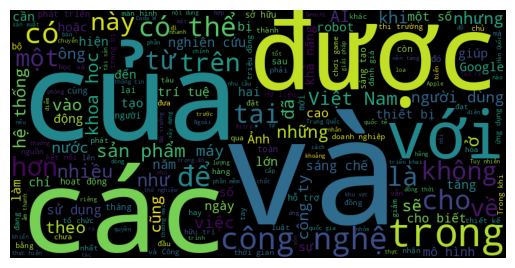

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['content'].dropna())
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc); plt.axis("off")
plt.show()